In [71]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [72]:
Eb_data = pd.read_csv(r"C:\Users\Adhi Ganapathy\Documents\Python_ws\Multiple Linear Regression 26072025\EB.csv")

In [73]:
print(type(Eb_data))

<class 'pandas.core.frame.DataFrame'>


In [74]:
Eb_data.head()

,Month,Units_Consumed,Appliance_Usage_Hrs,AC_Usage,No_of_Residents,Bill_Amount (₹)
0,Jan,130,2.5,0,2,1350
1,Feb,120,2.2,0,3,1400
2,Mar,150,3.5,1,3,1650
3,Apr,180,5.2,2,4,2200
4,May,220,6.5,4,4,2850


In [75]:
Eb_data.tail()

,Month,Units_Consumed,Appliance_Usage_Hrs,AC_Usage,No_of_Residents,Bill_Amount (₹)
7,Aug,225,6.8,4,4,2950
8,Sep,200,5.5,3,4,2550
9,Oct,170,4.2,1,3,2000
10,Nov,150,3.2,0,3,1750
11,Dec,140,2.8,0,2,1600


In [76]:
Eb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month                12 non-null     object 
 1   Units_Consumed       12 non-null     int64  
 2   Appliance_Usage_Hrs  12 non-null     float64
 3   AC_Usage             12 non-null     int64  
 4   No_of_Residents      12 non-null     int64  
 5   Bill_Amount (₹)      12 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 708.0+ bytes


In [77]:
Eb_data.isnull().any()

Month                  False
Units_Consumed         False
Appliance_Usage_Hrs    False
AC_Usage               False
No_of_Residents        False
Bill_Amount (₹)        False
dtype: bool

In [78]:
Eb_data.describe()

,Units_Consumed,Appliance_Usage_Hrs,AC_Usage,No_of_Residents,Bill_Amount (₹)
count,12.000000,12.000000,12.000000,12.0,12.000000
mean,179.583333,4.716667,2.083333,3.5,2225.000000
std,42.343741,1.876086,2.020726,1.0,698.862712
min,120.000000,2.200000,0.000000,2.0,1350.000000
25%,147.500000,3.100000,0.000000,3.0,1637.500000
50%,175.000000,4.700000,1.500000,3.5,2100.000000
75%,221.250000,6.575000,4.000000,4.0,2875.000000
max,240.000000,7.200000,5.000000,5.0,3250.000000


In [79]:
import seaborn as sns

Eb=['Units_Consumed','Appliance_Usage_Hrs','AC_Usage','No_of_Residents','Bill_Amount (₹)']

IQR: 73.75
lower_bound: 36.875
upper_bound: 331.875
Outliers:
 Empty DataFrame
Columns: [Units_Consumed]
Index: []


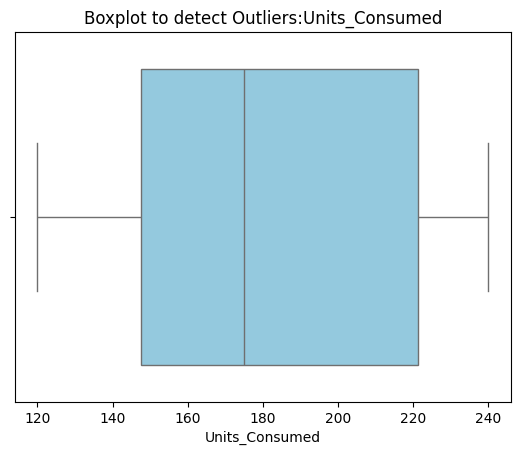

IQR: 3.475
lower_bound: -2.1125000000000003
upper_bound: 11.787500000000001
Outliers:
 Empty DataFrame
Columns: [Appliance_Usage_Hrs]
Index: []


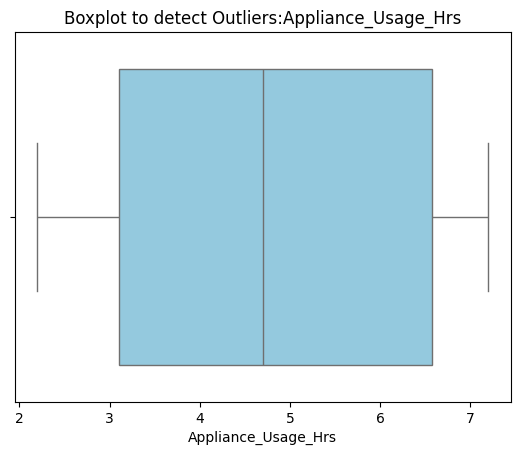

IQR: 4.0
lower_bound: -6.0
upper_bound: 10.0
Outliers:
 Empty DataFrame
Columns: [AC_Usage]
Index: []


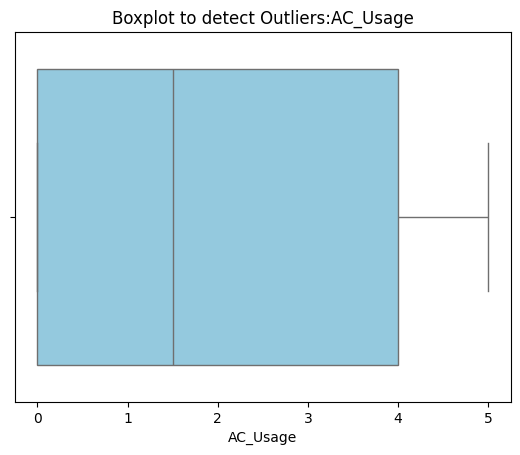

IQR: 1.0
lower_bound: 1.5
upper_bound: 5.5
Outliers:
 Empty DataFrame
Columns: [No_of_Residents]
Index: []


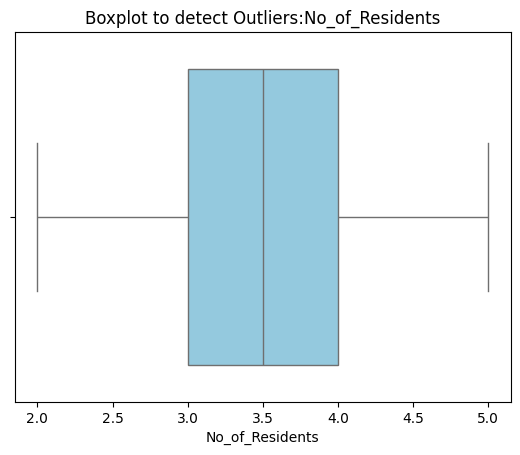

IQR: 1237.5
lower_bound: -218.75
upper_bound: 4731.25
Outliers:
 Empty DataFrame
Columns: [Bill_Amount (₹)]
Index: []


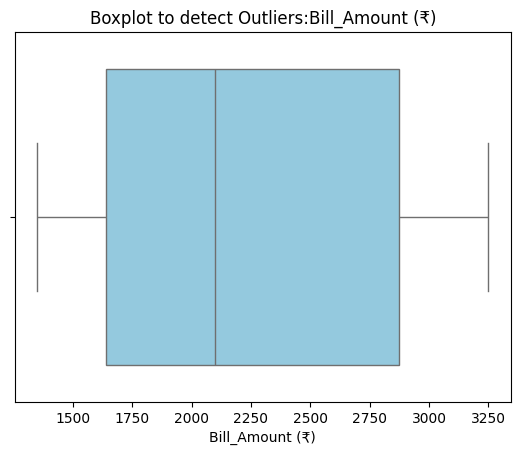

In [80]:
for col in Eb:
    a=Eb_data[col]
    Q1=a.quantile(0.25)
    Q3=a.quantile(0.75)
    IQR =Q3-Q1
    print("IQR:",IQR)
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    print("lower_bound:",lower_bound)
    print("upper_bound:",upper_bound)
    outliers=Eb_data[(a<lower_bound) | (a>upper_bound) ]
    print("Outliers:\n",outliers[[col]])
    sns.boxplot(x=a,color='skyblue')
    plt.title(f"Boxplot to detect Outliers:{col}")
    plt.show()
    

In [81]:

#correlation between columns
Eb_data[['Bill_Amount (₹)','Units_Consumed','Appliance_Usage_Hrs','No_of_Residents','AC_Usage']].corr()

,Bill_Amount (₹),Units_Consumed,Appliance_Usage_Hrs,No_of_Residents,AC_Usage
Bill_Amount (₹),1.000000,0.994955,0.989781,0.917074,0.983307
Units_Consumed,0.994955,1.000000,0.995123,0.896344,0.977902
Appliance_Usage_Hrs,0.989781,0.995123,1.000000,0.910988,0.980378
No_of_Residents,0.917074,0.896344,0.910988,1.000000,0.922261
AC_Usage,0.983307,0.977902,0.980378,0.922261,1.000000


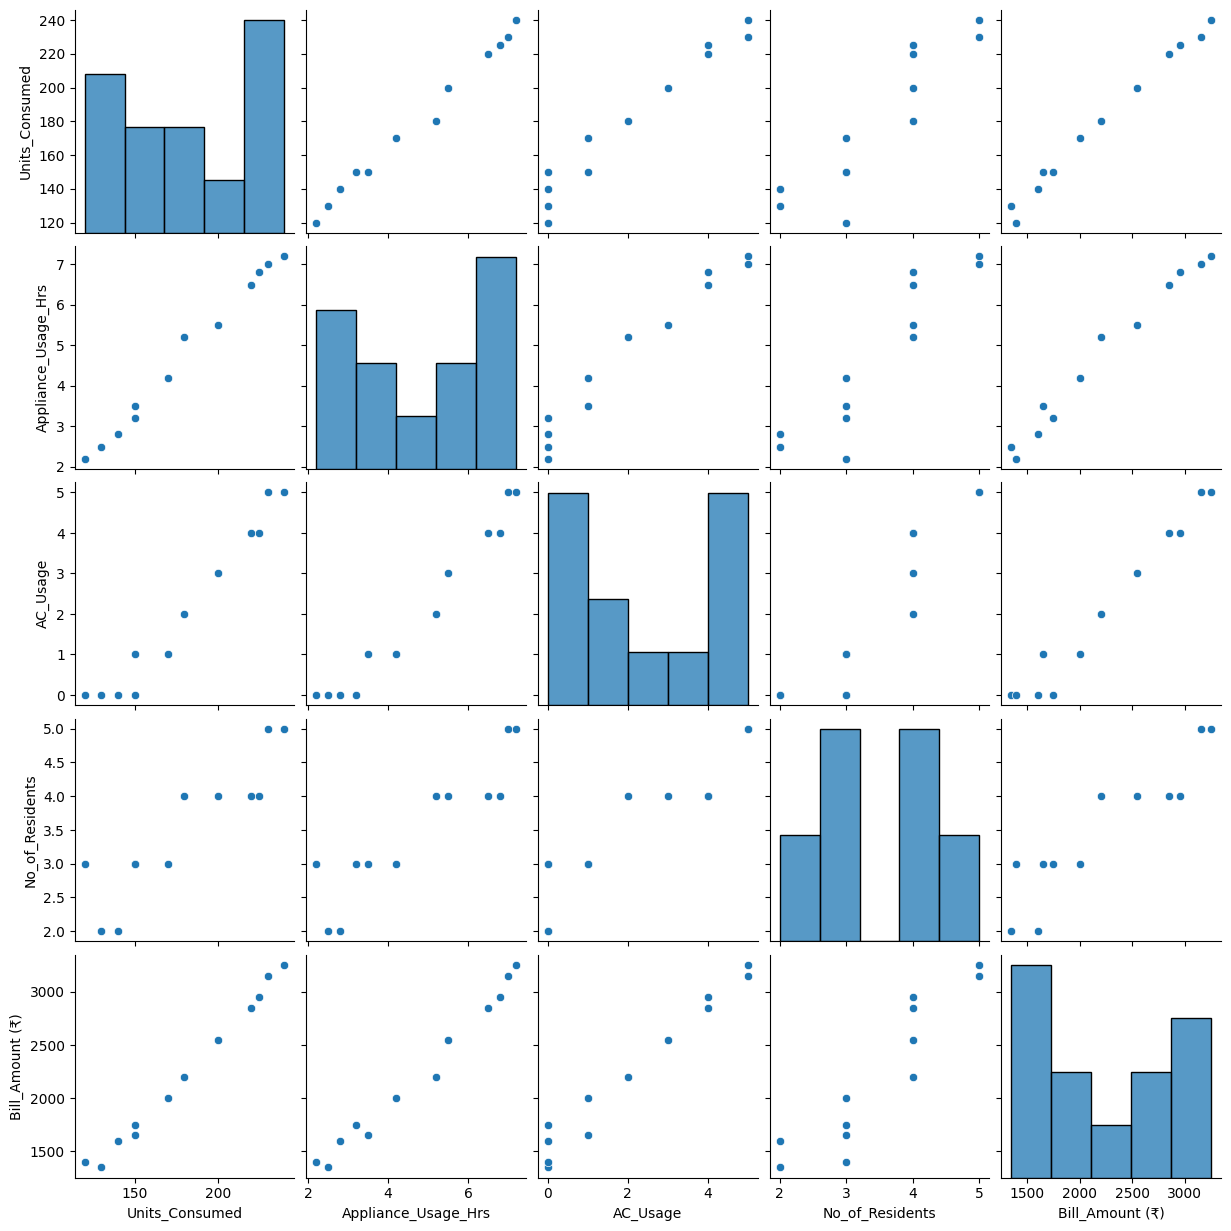

In [82]:
numeric_col=Eb_data.select_dtypes(include='number')
sns.pairplot(numeric_col)
plt.show()

<Axes: >

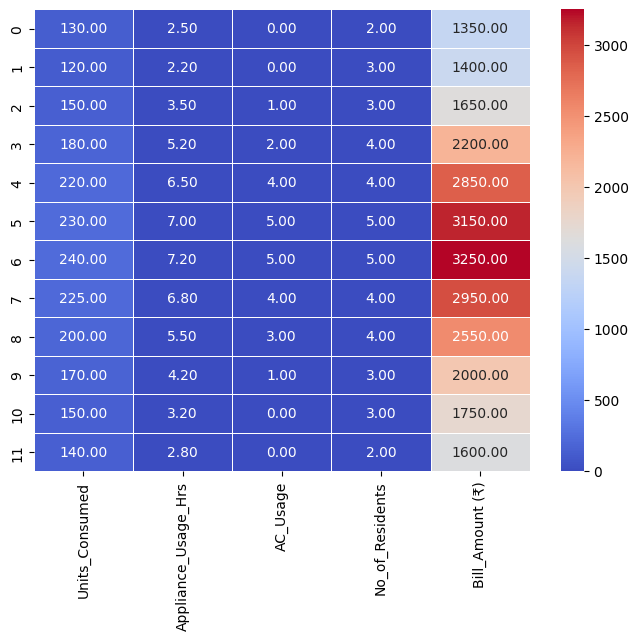

In [83]:
# Create heatmap with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_col,annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [86]:
df = pd.DataFrame(Eb_data)
x = df[['Units_Consumed','Appliance_Usage_Hrs','AC_Usage','No_of_Residents']]
y = df['Bill_Amount (₹)']

In [87]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train: You used to train the model.

x_test: You use now to test the model’s ability to predict correctly.

y_test: Actual bill amounts (for comparison).

y_pred: Predicted bill amounts by the model.

In [94]:
print("xtrain",x_train.shape)
print("xtest",x_test.shape)
print("ytrain",y_train.shape)
print("ytest",y_test.shape)

xtrain (9, 4)
xtest (3, 4)
ytrain (9,)
ytest (3,)


In [88]:
lm1=LinearRegression()
lm1.fit(x,y)
print(lm1.intercept_)
print(lm1.coef_)

-816.82057197928
[  18.52662819 -153.19509428   58.82689622   89.9317391 ]


In [89]:
list(zip(['Units_Consumed','Appliance_Usage_Hrs','AC_Usage','No_of_Residents'],lm1.coef_))

[('Units_Consumed', np.float64(18.52662819126376)),
 ('Appliance_Usage_Hrs', np.float64(-153.19509427509962)),
 ('AC_Usage', np.float64(58.82689621633854)),
 ('No_of_Residents', np.float64(89.93173909857435))]

<Axes: >

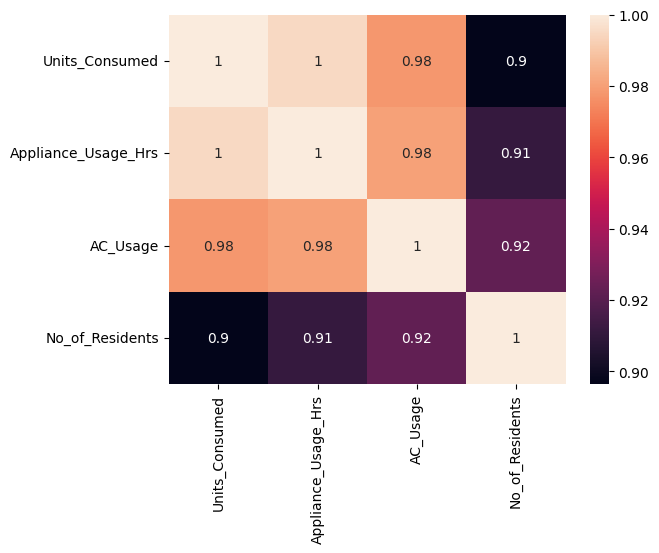

In [90]:
sns.heatmap(x.corr(),annot=True)

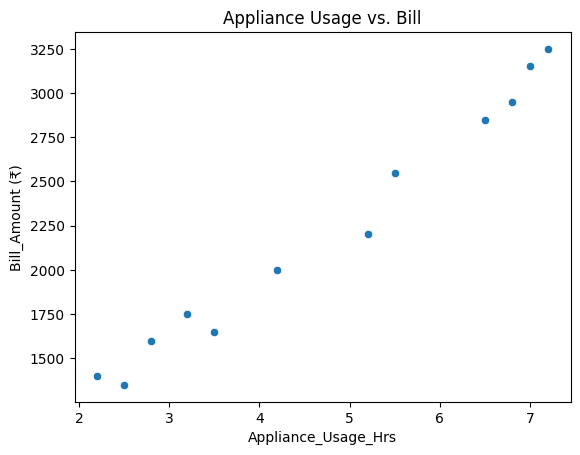

In [91]:
sns.scatterplot(x='Appliance_Usage_Hrs', y='Bill_Amount (₹)', data=df)
plt.title("Appliance Usage vs. Bill")
plt.show()

In [96]:
ypred=lm1.predict(x_test)
print(ypred)

[1741.74457233 2017.90893809 1388.51683539]


In [97]:
print(y_test)

10    1750
9     2000
0     1350
Name: Bill_Amount (₹), dtype: int64


In [99]:
comparison_df = pd.DataFrame({
    'Actualbill':y_test.values,
    'Predictedbill':ypred
})

In [100]:
print(comparison_df)

   Actualbill  Predictedbill
0        1750    1741.744572
1        2000    2017.908938
2        1350    1388.516835


| Metric   | Meaning                                                     |
| -------- | ----------------------------------------------------------- |
| **MAE**  | Avg. absolute difference between actual and predicted bills |
| **MSE**  | Penalizes larger errors (square of errors)                  |
| **RMSE** | Similar to MSE but same units as the target (₹)             |
| **R²**   | Proportion of variance explained (closer to 1 is better)    |


In [104]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [110]:
mae=mean_absolute_error(y_test,ypred)
mse=mean_squared_error(y_test,ypred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,ypred)

In [113]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 21.56
Mean Squared Error (MSE): 624.14
Root Mean Squared Error (RMSE): 24.98
R² Score: 0.9913


In [ ]:
[('Units_Consumed', np.float64(18.52662819126376)),
 ('Appliance_Usage_Hrs', np.float64(-153.19509427509962)),
 ('AC_Usage', np.float64(58.82689621633854)),
 ('No_of_Residents', np.float64(89.93173909857435))]


In [126]:
Units_Consumed= 200
Appliance_Usage_Hrs= 5.0
AC_Usage=3
No_of_Residents=4
y=(18.52662819126376*Units_Consumed)+(-153.19509427509962*Appliance_Usage_Hrs)+(58.82689621633854*AC_Usage)+(89.93173909857435*No_of_Residents)+(-816.82057197928)
print(y)

2658.737239941287


In [127]:
features = ['Units_Consumed', 'Appliance_Usage_Hrs', 'AC_Usage', 'No_of_Residents']
X_sample = pd.DataFrame([[200, 5.0, 3, 4]],columns=features)  # same order as feature list
model_pred =lm1.predict(X_sample)
print(model_pred)

[2658.73723994]


In [128]:
import pickle
picklefile=r'C:\Users\Adhi Ganapathy\Documents\Python_ws\Multiple Linear Regression 26072025\Model\MulLinear_reg.pkl'
with open(picklefile,'wb') as file:
    pickle.dump(lm1,file)

In [129]:
with open(picklefile,'rb') as file:
    load_model=pickle.load(file)

In [130]:
load_model.predict(X_sample)

array([2658.73723994])